# Countries in the world by population (2022) data analysis

In [479]:
# importing some libraries 
import requests
from bs4 import BeautifulSoup
import re
import dateutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [480]:
# Downloading contents of the web page
url =  "https://www.worldometers.info/world-population/population-by-country"
page = requests.get(url).text

# Description:

### This list includes both countries and dependent territories. Data based on the latest United Nations Population Division estimates.
### Click on the name of the country or dependency for current estimates (live population clock), historical data, and projected figures.


In [481]:
# parsing the web page with htmt content using BeautifulSoup 
soup = BeautifulSoup(page, 'html.parser')


In [482]:
# finding elements with refers to class
table= soup.find_all('div',class_='col-md-12')


In [483]:
# including some column headers and creating as dataframe
columns_h= ['country','Population','yearly_change','Net_change','density','Land_area','migrants','Fert_rate','Med_age','Urban_pop','World_share']
df=pd.DataFrame(columns=columns_h)

In [484]:
# initializing variables
country=''
Population=''
yearly_change=''
Net_change=''
density=''
Land_area=''
migrants=''
Fert_rate=''
Med_age=''
Urban_pop=''
World_share=''

In [485]:
# performing loop operation to identify dataset element and print under varibles, as well as we try to clean it
i=1
for tr in table[0].find_all('tr'):
    i=0
    for td in tr.find_all('td'):
        i= i+1
        if(i==2):
            country=td.text.replace('\n','')
        if(i==3):
            Population=td.text.replace(',','').replace('\n','')
        if(i==4):
            yearly_change=float(td.text.replace('\n', '').replace('%', ''))
        if(i==5):
            Net_change=td.text.replace(',','').replace('\n','')
        if(i==6):
            density=td.text.replace(',','').replace('\n','')
        if(i==7):
            Land_area=td.text.replace(',','').replace('\n','')
        if(i==8):
            migrants=td.text.replace(',','').replace('\n','')
        if(i==9):
            Fert_rate=td.text.replace('\n','')
        if(i==10):
            Med_age=td.text.replace('\n','')
        if(i==11):
            Urban_pop=td.text.replace('%','').replace('\n','')
        if(i==12):
            World_share=td.text.replace('%','').replace('\n','')    
    if('#'!=''):
        df = df.append(
        pd.Series([
        country,
        Population,
        yearly_change,
        Net_change,
        density,
        Land_area,
        migrants,
        Fert_rate,
        Med_age,
        Urban_pop,
        World_share],index= columns_h),ignore_index =True)
            
        
     

In [486]:
df

,country,Population,yearly_change,Net_change,density,Land_area,migrants,Fert_rate,Med_age,Urban_pop,World_share
0,,,,,,,,,,,
1,China,1439323776,0.39,5540090,153,9388211,-348399,1.7,38,61,18.47
2,India,1380004385,0.99,13586631,464,2973190,-532687,2.2,28,35,17.70
3,United States,331002651,0.59,1937734,36,9147420,954806,1.8,38,83,4.25
4,Indonesia,273523615,1.07,2898047,151,1811570,-98955,2.3,30,56,3.51
...,...,...,...,...,...,...,...,...,...,...,...
231,Montserrat,4992,0.06,3,50,100,,N.A.,N.A.,10,0.00
232,Falkland Islands,3480,3.05,103,0,12170,,N.A.,N.A.,66,0.00
233,Niue,1626,0.68,11,6,260,,N.A.,N.A.,46,0.00
234,Tokelau,1357,1.27,17,136,10,,N.A.,N.A.,0,0.00


# Successfully we extract dataset from the web page

In [487]:
df.shape

(236, 11)

### In this dataset 235 rows and 11 colums are present

# Data Cleaning

In [488]:
#deleting first row
df = df.iloc[1: , :]

In [489]:
df.head()

,country,Population,yearly_change,Net_change,density,Land_area,migrants,Fert_rate,Med_age,Urban_pop,World_share
1,China,1439323776,0.39,5540090,153,9388211,-348399,1.7,38,61,18.47
2,India,1380004385,0.99,13586631,464,2973190,-532687,2.2,28,35,17.70
3,United States,331002651,0.59,1937734,36,9147420,954806,1.8,38,83,4.25
4,Indonesia,273523615,1.07,2898047,151,1811570,-98955,2.3,30,56,3.51
5,Pakistan,220892340,2.0,4327022,287,770880,-233379,3.6,23,35,2.83


In [490]:
# replacing null values to NaN
df=df.replace('N.A.',np.NaN)


In [491]:
# creating deep copy of our original dataset
df2=df.copy()

In [492]:
# replacing blank values into NaN value
df2=df2.replace(' ',np.NaN)

In [493]:
df2

,country,Population,yearly_change,Net_change,density,Land_area,migrants,Fert_rate,Med_age,Urban_pop,World_share
1,China,1439323776,0.39,5540090,153,9388211,-348399,1.7,38,61,18.47
2,India,1380004385,0.99,13586631,464,2973190,-532687,2.2,28,35,17.70
3,United States,331002651,0.59,1937734,36,9147420,954806,1.8,38,83,4.25
4,Indonesia,273523615,1.07,2898047,151,1811570,-98955,2.3,30,56,3.51
5,Pakistan,220892340,2.00,4327022,287,770880,-233379,3.6,23,35,2.83
...,...,...,...,...,...,...,...,...,...,...,...
231,Montserrat,4992,0.06,3,50,100,NaN,NaN,NaN,10,0.00
232,Falkland Islands,3480,3.05,103,0,12170,NaN,NaN,NaN,66,0.00
233,Niue,1626,0.68,11,6,260,NaN,NaN,NaN,46,0.00
234,Tokelau,1357,1.27,17,136,10,NaN,NaN,NaN,0,0.00


In [494]:
# finding missing values
df2.isnull().sum()

country           0
Population        0
yearly_change     0
Net_change        0
density           0
Land_area         0
migrants         34
Fert_rate        34
Med_age          34
Urban_pop        13
World_share       0
dtype: int64

<AxesSubplot:>

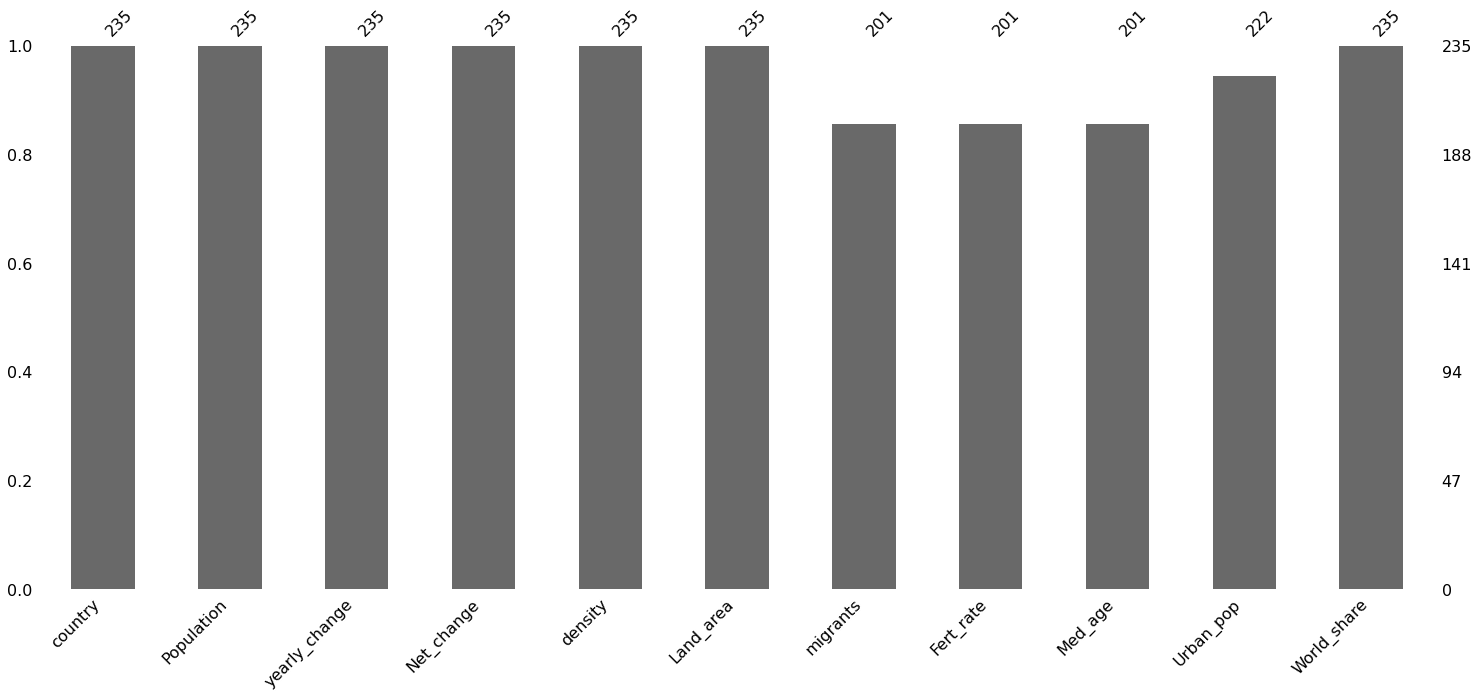

In [495]:
#identify missing values by bar graph
import missingno as msno
msno.bar(df2)

### here we can see only migrants, Fert_rate, Med_age, Urban_pop columns have missing values

In [496]:
#checking variable information of dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 1 to 235
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        235 non-null    object 
 1   Population     235 non-null    object 
 2   yearly_change  235 non-null    float64
 3   Net_change     235 non-null    object 
 4   density        235 non-null    object 
 5   Land_area      235 non-null    object 
 6   migrants       201 non-null    object 
 7   Fert_rate      201 non-null    object 
 8   Med_age        201 non-null    object 
 9   Urban_pop      222 non-null    object 
 10  World_share    235 non-null    object 
dtypes: float64(1), object(10)
memory usage: 20.3+ KB


## here python read most of variable's datatype as object , we have tochange it

In [497]:
#changing datatype with its appropriate one
df2['Population']=(df2['Population'].astype(str).astype(int))
df2['yearly_change']=(df2['yearly_change'].astype(str).astype(float))
df2['Net_change']=(df2['Net_change'].astype(str).astype(int))
df2['density']=(df2['density'].astype(str).astype(int))
df2['Land_area']=(df2['Land_area'].astype(str).astype(int))
df2['migrants']=(df2['migrants'].astype(str).astype(float))
df2['Fert_rate']=(df2['Fert_rate'].astype(str).astype(float))
df2['Med_age']=(df2['Med_age'].astype(str).astype(float))
df2['Urban_pop']=(df2['Urban_pop'].astype(str).astype(float))
df2['World_share']=(df2['World_share'].astype(str).astype(float))

# Report the top three countries based on the density column.

In [498]:
# grouping country and density column
sd=df2[["country", "density"]].groupby(['country'], as_index=False).sum().sort_values(by='density', ascending=False)
sd.head(3)

,country,density
136,Monaco,26337
121,Macao,21645
187,Singapore,8358


# country with highest fertility rate

In [436]:

sd=df2[["country", "Fert_rate"]].groupby(['country'], as_index=False).max().sort_values(by='Fert_rate', ascending=False)
sd.head(1)

,country,Fert_rate
150,Niger,7.0


# country with lowest fertility rate

In [437]:
sd=df2[["country", "Fert_rate"]].groupby(['country'], as_index=False).min().sort_values(by='Fert_rate', ascending=True)
sd.head(1)

,country,Fert_rate
194,South Korea,1.1


# examine the distribution of Population column

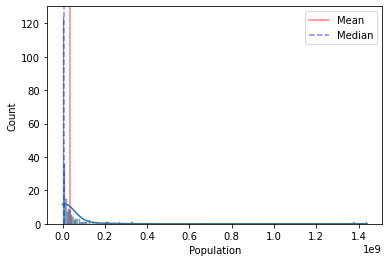

In [443]:
# creating hist plot to examin
sns.histplot(data= df2["Population"],kde=True)
plt.axvline(x=df2["Population"].mean(),color='red',alpha=0.5,label='Mean') # examine mean value
plt.axvline(x=df2["Population"].median(),c='blue',ls='--',alpha=0.5,label='Median') # examine median value
plt.legend()

In [444]:
df2["Population"].skew()

9.22957208791679

## distribution of Population column is right skewed 

# examine the distribution of Med-age column

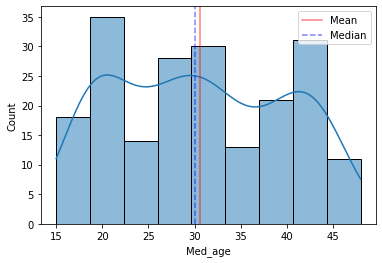

In [499]:
#creating histplot to examin
sns.histplot(data= df2["Med_age"],kde=True)
plt.axvline(x=df2["Med_age"].mean(),color='red',alpha=0.5,label='Mean') # examine mean value
plt.axvline(x=df2["Med_age"].median(),c='blue',ls='--',alpha=0.5,label='Median') # examine median value
plt.legend()

In [439]:
df2["Med_age"].skew()

0.10846046956111798

## distribution of Med-age column seems like normally distributed

# examine the distribution of Urban_pop column

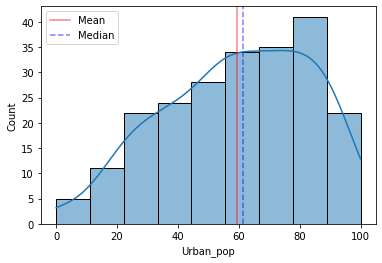

In [440]:
#creating histplot to examin
sns.histplot(data= df2["Urban_pop"],kde=True)
plt.axvline(x=df2["Urban_pop"].mean(),color='red',alpha=0.5,label='Mean') # examine mean value
plt.axvline(x=df2["Urban_pop"].median(),c='blue',ls='--',alpha=0.5,label='Median') # examine median value
plt.legend()

In [442]:
df2["Urban_pop"].skew()

-0.36411326135691713

## distribution of urban pop column is left skewed

# examine the distribution of yearly_change column

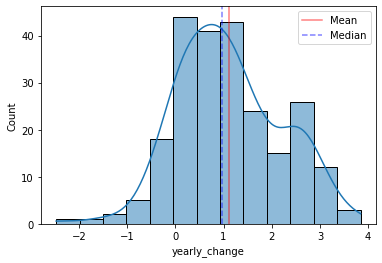

In [500]:
# examin by creating histplot
sns.histplot(data= df2["yearly_change"],kde=True)
plt.axvline(x=df2["yearly_change"].mean(),color='red',alpha=0.5,label='Mean') # examine mean value
plt.axvline(x=df2["yearly_change"].median(),c='blue',ls='--',alpha=0.5,label='Median') # examine median value
plt.legend()

In [446]:
df2["yearly_change"].skew()

0.1584307601677353

## distribution of yearly_change column seems like normally distributed

# sorting the population column based on lowest populated countries.

In [501]:
# sorting by grouping country and population
sd=df2[["country", "Population"]].groupby(['country'], as_index=False).sum().sort_values(by='Population', ascending=True)
sd

,country,Population
91,Holy See,801
211,Tokelau,1357
152,Niue,1626
69,Falkland Islands,3480
139,Montserrat,4992
...,...,...
158,Pakistan,220892340
97,Indonesia,273523615
224,United States,331002651
96,India,1380004385


In [502]:
# sorting population column refers to whole dataset
df2.sort_values( by="Population",
    ascending=True,
     kind="mergesort"
)

,country,Population,yearly_change,Net_change,density,Land_area,migrants,Fert_rate,Med_age,Urban_pop,World_share
235,Holy See,801,0.25,2,2003,0,NaN,NaN,NaN,NaN,0.00
234,Tokelau,1357,1.27,17,136,10,NaN,NaN,NaN,0.0,0.00
233,Niue,1626,0.68,11,6,260,NaN,NaN,NaN,46.0,0.00
232,Falkland Islands,3480,3.05,103,0,12170,NaN,NaN,NaN,66.0,0.00
231,Montserrat,4992,0.06,3,50,100,NaN,NaN,NaN,10.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
5,Pakistan,220892340,2.00,4327022,287,770880,-233379.0,3.6,23.0,35.0,2.83
4,Indonesia,273523615,1.07,2898047,151,1811570,-98955.0,2.3,30.0,56.0,3.51
3,United States,331002651,0.59,1937734,36,9147420,954806.0,1.8,38.0,83.0,4.25
2,India,1380004385,0.99,13586631,464,2973190,-532687.0,2.2,28.0,35.0,17.70


In [455]:
# downloading scraped dataset as excel format
df.to_excel(r'C:/Users/Chinmay/Downloads/Untitled9.xlsx', index = False)